<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/Iconnet_Linear_Regresi_dan_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perbandingan Regresi Linear dan Random Forest pada wilayah Jabodetabek dan Banten


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor Data Penjualan dari Excel ke DataFrame

Kode dibawah mengimpor dataset penjualan dari file Excel yang disimpan di GitHub dan menampilkan 5 baris pertama dari DataFrame `df`. Proses ini memungkinkan analisis data lebih lanjut di dalam Google Colab.


In [4]:
df=pd.read_excel('https://github.com/irwanmaulana42/google-collab/raw/refs/heads/master/data_penjualan_iconnet_2022_2023.xlsx')
df.head()

,BW,MONTH,YEAR,WILAYAH,latitude,longitude
0,10 Mbps,April,2022,Kab. Bekasi,-6.154664,107.0235344
1,20 Mbps,April,2022,Kab. Bekasi,-6.156413,107.028303
2,10 Mbps,April,2022,Kab. Bekasi,-6.156794,107.02828844597303
3,10 Mbps,April,2022,Kab. Bekasi,-6.156961,107.02855847776
4,20 Mbps,April,2022,Kab. Bekasi,-6.158325,107.019362


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101325 entries, 0 to 101324
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   BW         101325 non-null  object 
 1   MONTH      101325 non-null  object 
 2   YEAR       101325 non-null  int64  
 3   WILAYAH    100350 non-null  object 
 4   latitude   101207 non-null  float64
 5   longitude  101275 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


# Menghapus Kolom 'latitude' dan 'longitude' dari DataFrame

Kode di atas memeriksa apakah kolom 'latitude' dan 'longitude' ada dalam DataFrame `df`. Jika kolom-kolom tersebut ada, maka kode ini akan menghapusnya dari DataFrame. Setelah itu, baris pertama dari DataFrame yang telah dimodifikasi ditampilkan. Proses ini biasanya dilakukan untuk membersihkan data dari informasi yang tidak diperlukan sebelum analisis lebih lanjut.


In [6]:
if 'latitude' in df.columns:
  df = df.drop('latitude', axis=1)
if 'longitude' in df.columns:
  df = df.drop('longitude', axis=1)

df.head()


,BW,MONTH,YEAR,WILAYAH
0,10 Mbps,April,2022,Kab. Bekasi
1,20 Mbps,April,2022,Kab. Bekasi
2,10 Mbps,April,2022,Kab. Bekasi
3,10 Mbps,April,2022,Kab. Bekasi
4,20 Mbps,April,2022,Kab. Bekasi


# Memproses Kolom 'BW' untuk Menghilangkan Karakter Non-Numerik

Kode ini melakukan langkah-langkah berikut pada kolom 'BW' di DataFrame `df`:

1. **Mengubah Tipe Data**: Mengonversi nilai di kolom 'BW' menjadi string.
2. **Menghapus Karakter Non-Numerik**: Menghilangkan semua karakter yang bukan angka.
3. **Mengonversi ke Numerik**: Mengonversi hasil ke tipe data numerik, dengan nilai yang tidak valid menjadi `NaN`.
4. **Mengisi Nilai NaN**: Mengganti nilai `NaN` dengan 0.
5. **Menampilkan Informasi**: Menampilkan informasi dan lima baris pertama dari DataFrame.

Langkah-langkah ini memastikan kolom 'BW' bersih dan siap untuk analisis lebih lanjut.


In [7]:
# Ubah semua nilai di kolom 'BW' menjadi string terlebih dahulu
df['BW'] = df['BW'].astype(str)

# Remove non-numeric characters and convert to numeric, replacing errors with NaN
df['BW'] = pd.to_numeric(df['BW'].str.replace(r'[^0-9]', '', regex=True), errors='coerce')

# Fill NaN values with 0, you might want to choose a different strategy based on your data
df['BW'] = df['BW'].fillna(0).astype(int)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101325 entries, 0 to 101324
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   BW       101325 non-null  int64 
 1   MONTH    101325 non-null  object
 2   YEAR     101325 non-null  int64 
 3   WILAYAH  100350 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB
None
   BW  MONTH  YEAR      WILAYAH
0  10  April  2022  Kab. Bekasi
1  20  April  2022  Kab. Bekasi
2  10  April  2022  Kab. Bekasi
3  10  April  2022  Kab. Bekasi
4  20  April  2022  Kab. Bekasi


# Menghitung Jumlah Data per Wilayah

Kode ini melakukan langkah-langkah berikut:

1. **Pengelompokan Data**: Mengelompokkan DataFrame `df` berdasarkan kolom 'WILAYAH'.
2. **Menghitung Jumlah**: Menghitung jumlah entri untuk setiap wilayah dengan metode `.count()`.
3. **Menampilkan Hasil**: Mencetak jumlah data per wilayah ke layar.
4. **Menampilkan DataFrame**: Mencetak lima baris pertama dari DataFrame `df` untuk melihat struktur datanya.

Hasil ini memberikan informasi tentang distribusi jumlah data di setiap wilayah.


In [8]:
wilayah_counts = df.groupby('WILAYAH')['WILAYAH'].count()
print(wilayah_counts)
print(df.head())

WILAYAH
Kab. Bekasi                    3664
Kab. Bogor                    16574
Kab. Lebak                     1223
Kab. Pandeglang                3298
Kab. Serang                     305
Kab. Tangerang                 8300
Kota Adm. Jakarta  Selatan        1
Kota Adm. Jakarta Barat        1792
Kota Adm. Jakarta Pusat        1384
Kota Adm. Jakarta Selatan      6348
Kota Adm. Jakarta Timur        5995
Kota Adm. Jakarta Utara        1994
Kota Bekasi                    1586
Kota Bogor                      722
Kota Cilegon                   2085
Kota Depok                    21057
Kota Rangkasbitung              878
Kota Serang                    6198
Kota Tangerang                 8239
Kota Tangerang Selatan         8707
Name: WILAYAH, dtype: int64
   BW  MONTH  YEAR      WILAYAH
0  10  April  2022  Kab. Bekasi
1  20  April  2022  Kab. Bekasi
2  10  April  2022  Kab. Bekasi
3  10  April  2022  Kab. Bekasi
4  20  April  2022  Kab. Bekasi


# Menetapkan Kode Wilayah dan Memproses DataFrame

Kode ini melakukan langkah-langkah berikut:

1. **Fungsi `kode_wilayah`**: Menerima parameter `wilayah` dan mengembalikan kode numerik berdasarkan nama wilayah yang diberikan. Jika wilayah bukan string atau tidak dikenali, fungsi mengembalikan `None`.
  
2. **Menambahkan Kolom 'Kode Wilayah'**: Menggunakan fungsi `apply()` untuk menerapkan `kode_wilayah` pada kolom 'WILAYAH' dan menambahkan hasilnya sebagai kolom baru 'Kode Wilayah'.

3. **Menghapus Baris NA/NaN**: Menghapus semua baris yang memiliki nilai `NaN` pada kolom 'Kode Wilayah'.

4. **Mengubah Tipe Data**: Mengubah kolom 'Kode Wilayah' menjadi tipe integer.

5. **Menghapus Kolom 'WILAYAH'**: Menghapus kolom 'WILAYAH' dari DataFrame karena sudah tidak diperlukan.

6. **Menampilkan DataFrame**: Mencetak DataFrame untuk melihat hasil perubahan.

Hasilnya adalah DataFrame yang memiliki kolom 'Kode Wilayah' yang terisi dan kolom 'WILAYAH' yang dihapus.


In [9]:
# Fungsi untuk menetapkan kode wilayah
def kode_wilayah(wilayah):
    # Cek apakah wilayah adalah string, jika tidak, kembalikan None
    if isinstance(wilayah, str):
        if 'Jakarta' in wilayah:
            return 1
        elif 'Bogor' in wilayah:
            return 2
        elif 'Depok' in wilayah:
            return 3
        elif 'Tangerang' in wilayah:
            return 4
        elif 'Bekasi' in wilayah:
            return 5
        elif 'Serang' in wilayah or 'Cilegon' in wilayah or 'Lebak' in wilayah or 'Pandeglang' in wilayah:
            return 6
        else:
            return None
    else:
        return None

# Menambahkan kolom 'Kode Wilayah'
df['Kode Wilayah'] = df['WILAYAH'].apply(kode_wilayah)

# Menghapus jika Kode wilayah NA atau NaN
df = df.dropna(subset=['Kode Wilayah'])

# Mengubah kode wilayah menjadi integer
df['Kode Wilayah'] = df['Kode Wilayah'].astype(int)

# Menghapus kolom 'WILAYAH'
df.drop('WILAYAH', axis=1, inplace=True)

# Menampilkan DataFrame untuk melihat hasilnya
print(df)

        BW      MONTH  YEAR  Kode Wilayah
0       10      April  2022             5
1       20      April  2022             5
2       10      April  2022             5
3       10      April  2022             5
4       20      April  2022             5
...     ..        ...   ...           ...
100345  35  September  2023             4
100346  35  September  2023             4
100347  20  September  2023             4
100348  35  September  2023             4
100349  35  September  2023             4

[99472 rows x 4 columns]


<ipython-input-9-54efa6f9a0df>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kode Wilayah'] = df['Kode Wilayah'].astype(int)
<ipython-input-9-54efa6f9a0df>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('WILAYAH', axis=1, inplace=True)


# Mengubah Nama Bulan dalam Bahasa Indonesia ke Nomor Bulan

Kode ini melakukan langkah-langkah berikut:

1. **Pemetaan Bulan**: Membuat kamus (`month_mapping`) yang mengaitkan nama bulan dalam bahasa Inggris (yang seharusnya diubah ke bahasa Indonesia dalam konteks ini) dengan nomor bulan yang sesuai (1 hingga 12).

2. **Mengganti Nama Bulan**: Menggunakan metode `map()` untuk mengganti nama bulan pada kolom 'MONTH' dalam DataFrame `df` dengan nomor bulan yang sesuai berdasarkan kamus yang telah dibuat.

Hasilnya adalah kolom 'MONTH' yang sekarang berisi nomor bulan alih-alih nama bulan.


In [10]:
# Create a dictionary to map Indonesian month names to month numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Replace Indonesian month names with month numbers using the mapping
df['MONTH'] = df['MONTH'].map(month_mapping)

<ipython-input-10-92b875924c69>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['MONTH'].map(month_mapping)


# Menghapus Baris dengan Kode Wilayah yang Hilang

1. **Menghapus Baris**: Kode ini menghapus baris-baris dalam DataFrame `df` yang memiliki nilai `NaN` (hilang) pada kolom 'MONTH'.

2. **Mengubah Tipe Data**: Setelah itu, kolom 'MONTH' diubah menjadi tipe data integer menggunakan `astype(int)`.

3. **Menampilkan Data**: Kode `print(df.head())` digunakan untuk menampilkan lima baris pertama dari DataFrame yang telah diperbarui, sehingga kita bisa melihat hasilnya.


In [11]:
# Menghapus jika Kode wilayah NA atau NaN
df = df.dropna(subset=['MONTH'])

df['MONTH'] = df['MONTH'].astype(int)

print(df.head())

   BW  MONTH  YEAR  Kode Wilayah
0  10      4  2022             5
1  20      4  2022             5
2  10      4  2022             5
3  10      4  2022             5
4  20      4  2022             5


# Menghitung dan Memvisualisasikan Jumlah Pelanggan per Bulan

1. **Mengelompokkan Data**: Kode ini mengelompokkan data dalam DataFrame `df` berdasarkan tahun dan bulan, lalu menghitung jumlah pelanggan (dihitung dari `Kode Wilayah`). Hasilnya disimpan dalam variabel `customer_per_month`.

2. **Membuat Grafik Batang**: Menggunakan `matplotlib` dan `seaborn`, kode ini membuat grafik batang yang menunjukkan jumlah pelanggan per bulan.

3. **Pengaturan Visual**:
   - Grafik diatur dengan ukuran 12x6 inci dan palet warna biru.
   - Judul grafik, label sumbu x dan y, serta legenda untuk tahun ditambahkan.

4. **Menampilkan Nilai**: Nilai jumlah pelanggan ditambahkan di atas setiap batang untuk memberikan informasi yang lebih jelas.

5. **Menampilkan Grafik**: Terakhir, grafik ditampilkan dengan `plt.show()`.


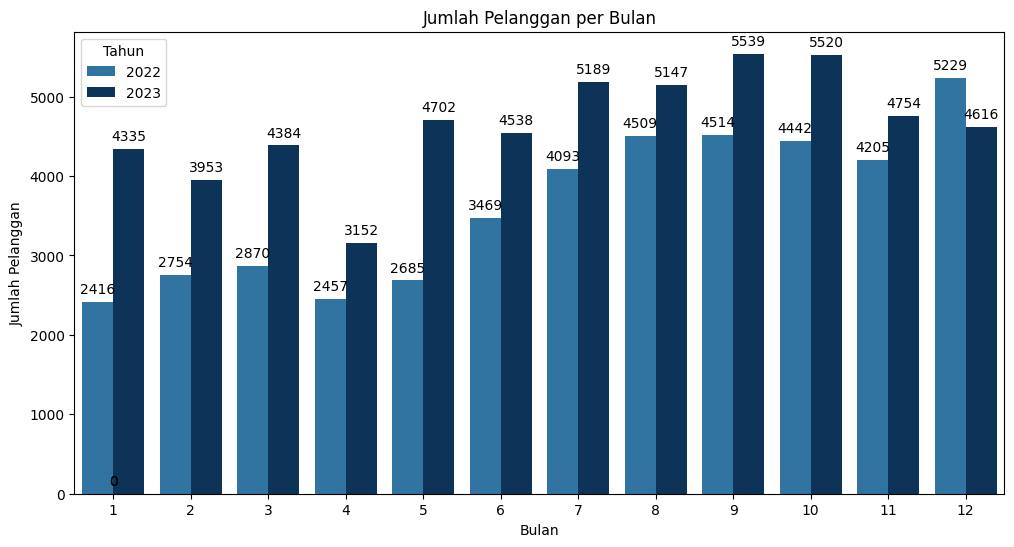

In [12]:
# Group data by year and month, then count the number of customers
customer_per_month = df.groupby(['YEAR', 'MONTH'])['Kode Wilayah'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))

# Set color palette with blue and dark blue
bar_plot = sns.barplot(x='MONTH', y='Kode Wilayah', hue='YEAR', data=customer_per_month,
                       palette=['#1f77b4', '#003366'])

plt.title('Jumlah Pelanggan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Tahun')

# Add the values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),  # 9 points vertical offset
                      textcoords = 'offset points')

plt.show()


# Menghitung dan Memvisualisasikan Jumlah Pelanggan per Bandwidth

1. **Mengelompokkan Data**: Kode ini mengelompokkan data dalam DataFrame `df` berdasarkan bandwidth (`BW`) dan menghitung jumlah pelanggan yang terdaftar untuk setiap bandwidth. Hasilnya disimpan dalam variabel `customer_per_bandwidth`.

2. **Membuat Grafik Batang**: Menggunakan `matplotlib` dan `seaborn`, kode ini membuat grafik batang untuk menunjukkan jumlah pelanggan berdasarkan bandwidth.

3. **Pengaturan Visual**:
   - Grafik diatur dengan ukuran 12x6 inci dan palet warna biru.
   - Judul grafik, label sumbu x untuk bandwidth, dan label sumbu y untuk jumlah pelanggan ditambahkan.

4. **Menampilkan Nilai**: Nilai jumlah pelanggan ditambahkan di atas setiap batang untuk memberikan informasi yang lebih jelas.

5. **Menampilkan Grafik**: Terakhir, grafik ditampilkan dengan `plt.show()`.

<ipython-input-13-d5ee1c45db18>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='BW', y='Kode Wilayah', data=customer_per_bandwidth,
<ipython-input-13-d5ee1c45db18>:8: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(x='BW', y='Kode Wilayah', data=customer_per_bandwidth,


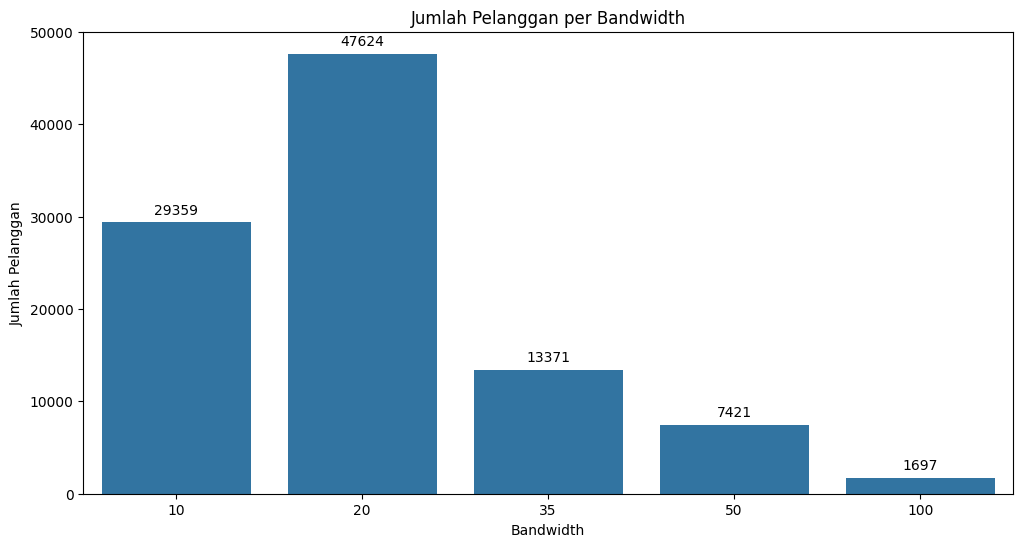

In [13]:
# Group data by bandwidth and count the number of customers
customer_per_bandwidth = df.groupby('BW')['Kode Wilayah'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))

# Set color palette with blue and dark blue
bar_plot = sns.barplot(x='BW', y='Kode Wilayah', data=customer_per_bandwidth,
                       palette=['#1f77b4'])

plt.title('Jumlah Pelanggan per Bandwidth')
plt.xlabel('Bandwidth')
plt.ylabel('Jumlah Pelanggan')


# Add the values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),  # 9 points vertical offset
                      textcoords = 'offset points')

plt.show()


# Menghitung dan Memvisualisasikan Jumlah Pelanggan per Wilayah

1. **Mengelompokkan Data**: Kode ini mengelompokkan data dalam DataFrame `df` berdasarkan `Kode Wilayah` dan menghitung jumlah pelanggan untuk setiap wilayah. Hasilnya disimpan dalam variabel `customer_per_region` dengan kolom baru bernama `Jumlah Pelanggan`.

2. **Membuat Grafik Batang**: Menggunakan `matplotlib` dan `seaborn`, kode ini membuat grafik batang untuk menunjukkan jumlah pelanggan berdasarkan kode wilayah.

3. **Pengaturan Visual**:
   - Grafik diatur dengan ukuran 12x6 inci dan menggunakan palet warna biru yang bervariasi.
   - Judul grafik, label sumbu x untuk kode wilayah, dan label sumbu y untuk jumlah pelanggan ditambahkan.

4. **Menampilkan Nilai**: Nilai jumlah pelanggan ditambahkan di atas setiap batang untuk memberikan informasi yang lebih jelas.

5. **Menampilkan Grafik**: Terakhir, grafik ditampilkan dengan `plt.show()`.

<ipython-input-14-312af6714b3f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Kode Wilayah', y='Jumlah Pelanggan', data=customer_per_region,


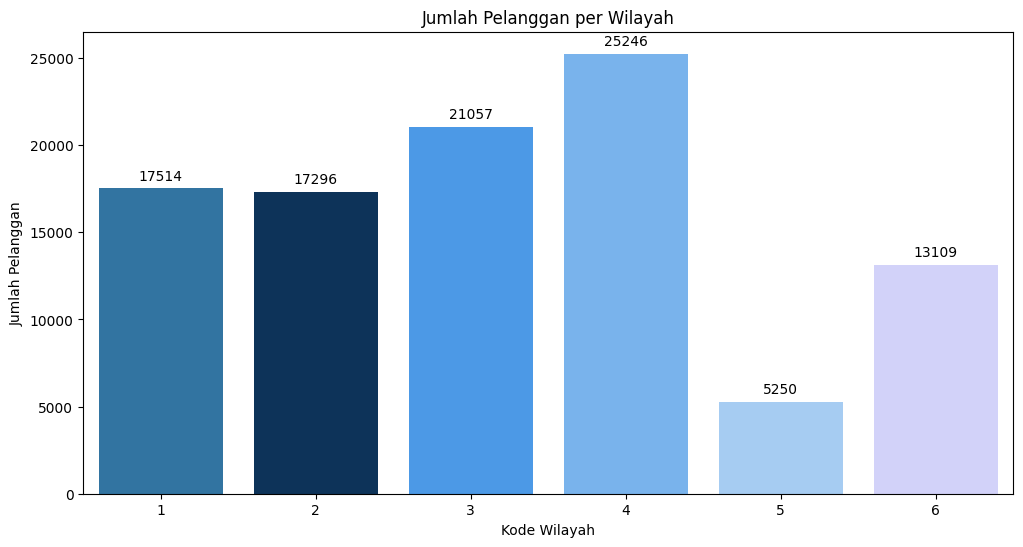

In [14]:
# Group data by region and count the number of customers
customer_per_region = df.groupby('Kode Wilayah')['Kode Wilayah'].count().reset_index(name='Jumlah Pelanggan')

# Create a bar chart
plt.figure(figsize=(12, 6))

# Set color palette with blue and dark blue
bar_plot = sns.barplot(x='Kode Wilayah', y='Jumlah Pelanggan', data=customer_per_region,
                       palette=['#1f77b4', '#003366', '#3399ff', '#66b3ff', '#99ccff', '#ccccff'])

plt.title('Jumlah Pelanggan per Wilayah')
plt.xlabel('Kode Wilayah')
plt.ylabel('Jumlah Pelanggan')


# Add the values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),  # 9 points vertical offset
                      textcoords = 'offset points')

plt.show()


# **Regresi Linear**

## Prediksi jumlah pelanggan berdasarkan bulan

<ipython-input-15-846260d34c78>:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hasil['Data Sebenarnya'].fillna(0, inplace=True)


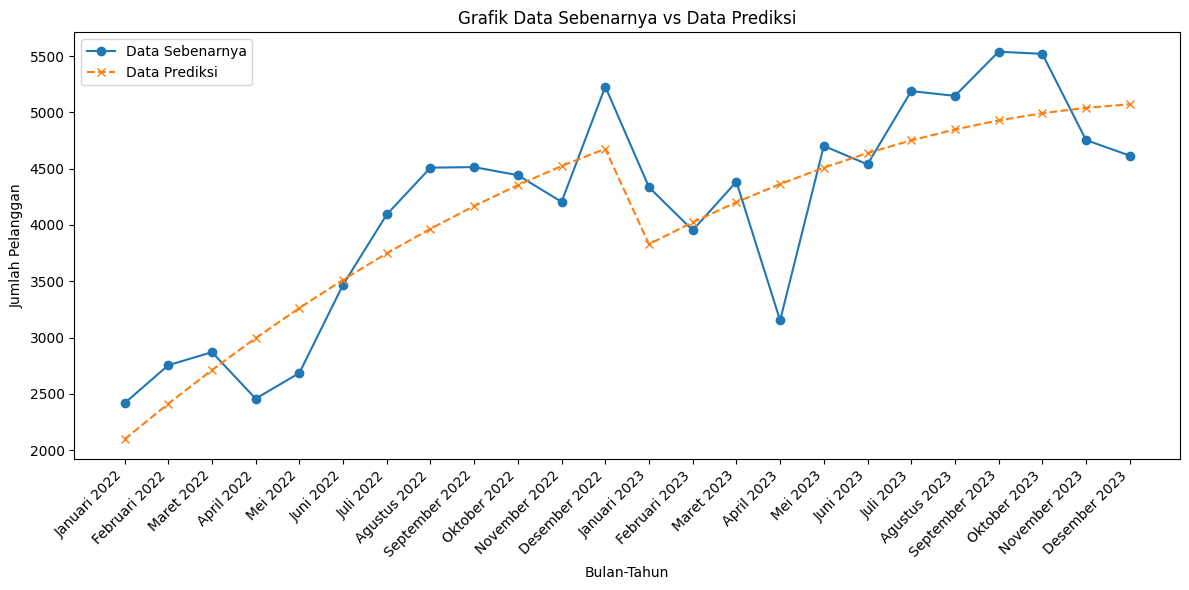

    Tahun  Bulan  Data Sebenarnya  Data Prediksi
0    2022      1             2416    2095.687793
2    2022      2             2754    2411.702432
4    2022      3             2870    2711.440589
6    2022      4             2457    2994.902262
8    2022      5             2685    3262.087452
10   2022      6             3469    3512.996159
12   2022      7             4093    3747.628383
14   2022      8             4509    3965.984123
16   2022      9             4514    4168.063380
18   2022     10             4442    4353.866154
20   2022     11             4205    4523.392445
22   2022     12             5229    4676.642253
1    2023      1             4335    3829.235991
3    2023      2             3953    4023.604924
5    2023      3             4384    4201.697374
7    2023      4             3152    4363.513340
9    2023      5             4702    4509.052824
11   2023      6             4538    4638.315824
13   2023      7             5189    4751.302341
15   2023      8    

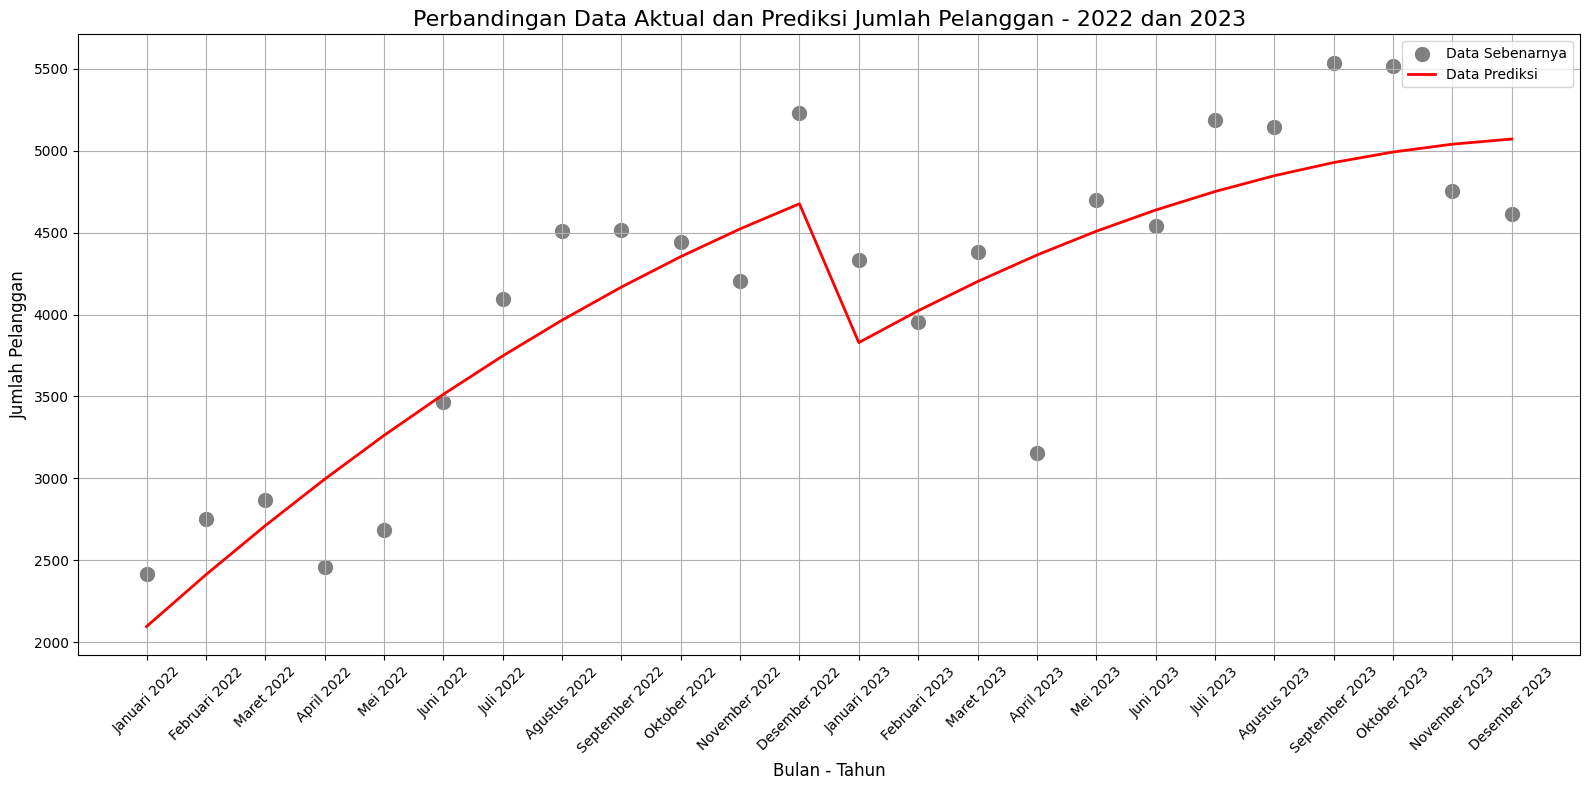

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan bulan dan tahun, menghitung jumlah pelanggan
customer_per_month = df.groupby(['YEAR', 'MONTH'])['Kode Wilayah'].count().reset_index()
customer_per_month.columns = ['Tahun', 'Bulan', 'Data Sebenarnya']

# Mengurutkan data berdasarkan Tahun dan Bulan
customer_per_month.sort_values(by=['Tahun', 'Bulan'], inplace=True)

# Memisahkan fitur (bulan dan tahun) dan target (jumlah pelanggan)
X = customer_per_month[['Tahun', 'Bulan']].values  # Fitur gabungan Tahun dan Bulan
y = customer_per_month['Data Sebenarnya'].values    # Target (jumlah pelanggan)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur (standard scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menciptakan fitur polynomial
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

# Membuat dan melatih model regresi linear polinomial
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_test = model_poly.predict(X_poly_test)

# Menghitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100


# Melakukan prediksi pada semua bulan di tahun 2022 dan 2023
all_years = np.tile([2022, 2023], 12)  # Tahun 2022 dan 2023
all_months = np.repeat(np.arange(1, 13), 2)  # Bulan 1 hingga 12 di kedua tahun
all_data = np.column_stack((all_years, all_months))
all_data_scaled = scaler.transform(all_data)  # Normalisasi data
all_data_poly = poly.transform(all_data_scaled)

# Prediksi pada semua bulan dan tahun
prediksi = model_poly.predict(all_data_poly)

# Membuat DataFrame untuk menampilkan prediksi
df_prediksi = pd.DataFrame({
    'Tahun': all_years,
    'Bulan': all_months,
    'Data Prediksi': prediksi
})

# Menggabungkan prediksi dengan data sebenarnya
df_hasil = pd.merge(df_prediksi, customer_per_month, how='left', on=['Tahun', 'Bulan'])

# Mengisi nilai yang hilang dengan 0 untuk bulan yang tidak ada
df_hasil['Data Sebenarnya'].fillna(0, inplace=True)

# Mengurutkan data berdasarkan Tahun dan Bulan
df_hasil.sort_values(by=['Tahun', 'Bulan'], inplace=True)

# Memastikan kolom 'Bulan' dan 'Tahun' adalah integer
df_hasil['Bulan'] = df_hasil['Bulan'].astype(int)
df_hasil['Tahun'] = df_hasil['Tahun'].astype(int)

# Mengubah angka bulan menjadi nama bulan
month_names = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Menyiapkan sumbu x (kombinasi Nama Bulan dan Tahun)
x_labels = [f'{month_names[int(row["Bulan"]) - 1]} {int(row["Tahun"])}' for _, row in df_hasil.iterrows()]

# Membuat plot
plt.figure(figsize=(12, 6))

# Plot data sebenarnya
plt.plot(x_labels, df_hasil['Data Sebenarnya'], label='Data Sebenarnya', marker='o')

# Plot data prediksi
plt.plot(x_labels, df_hasil['Data Prediksi'], label='Data Prediksi', linestyle='--', marker='x')

# Menambahkan judul dan label
plt.title('Grafik Data Sebenarnya vs Data Prediksi')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Tampilkan tabel data sebenarnya dan data prediksi
df_hasil_display = df_hasil[['Tahun', 'Bulan', 'Data Sebenarnya', 'Data Prediksi']]
print(df_hasil_display)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Memisahkan data berdasarkan tahun
df_2022 = df_hasil[df_hasil['Tahun'] == 2022]
df_2023 = df_hasil[df_hasil['Tahun'] == 2023]

# # Menyiapkan label bulan untuk tahun 2022
# x_labels_2022 = [f'{month_names[month-1]} 2022' for month in df_2022['Bulan']]

# # Membuat plot untuk tahun 2022
# plt.figure(figsize=(12, 6))
# plt.scatter(df_2022['Bulan'], df_2022['Data Sebenarnya'], color='gray', label='Data Sebenarnya', s=100)
# plt.plot(df_2022['Bulan'], df_2022['Data Prediksi'], label='Data Prediksi', color='red', linewidth=2)
# plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2022', fontsize=16)
# plt.xlabel('Bulan - Tahun', fontsize=12)
# plt.ylabel('Jumlah Pelanggan', fontsize=12)
# plt.xticks(df_2022['Bulan'], x_labels_2022, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.grid(True)
# plt.show()

# # Menyiapkan label bulan untuk tahun 2023
# x_labels_2023 = [f'{month_names[month-1]} 2023' for month in df_2023['Bulan']]

# # Membuat plot untuk tahun 2023
# plt.figure(figsize=(12, 6))
# plt.scatter(df_2023['Bulan'], df_2023['Data Sebenarnya'], color='gray', label='Data Sebenarnya', s=100)
# plt.plot(df_2023['Bulan'], df_2023['Data Prediksi'], label='Data Prediksi', color='red', linewidth=2)
# plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2023', fontsize=16)
# plt.xlabel('Bulan - Tahun', fontsize=12)
# plt.ylabel('Jumlah Pelanggan', fontsize=12)
# plt.xticks(df_2023['Bulan'], x_labels_2023, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.grid(True)
# plt.show()

# Menyiapkan label bulan untuk tahun 2022 dan 2023
x_labels = [f'{month_names[month-1]} 2022' for month in df_2022['Bulan']] + \
           [f'{month_names[month-1]} 2023' for month in df_2023['Bulan']]

# Gabungkan data untuk kedua tahun
bulan_all = list(df_2022['Bulan']) + list(df_2023['Bulan'] + 12)  # Offset bulan 2023 agar berlanjut setelah 2022
data_sebenarnya_all = list(df_2022['Data Sebenarnya']) + list(df_2023['Data Sebenarnya'])
data_prediksi_all = list(df_2022['Data Prediksi']) + list(df_2023['Data Prediksi'])

# Membuat plot gabungan
plt.figure(figsize=(16, 8))
plt.scatter(bulan_all, data_sebenarnya_all, color='gray', label='Data Sebenarnya', s=100)
plt.plot(bulan_all, data_prediksi_all, label='Data Prediksi', color='red', linewidth=2)
plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2022 dan 2023', fontsize=16)
plt.xlabel('Bulan - Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(ticks=range(1, len(x_labels) + 1), labels=x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


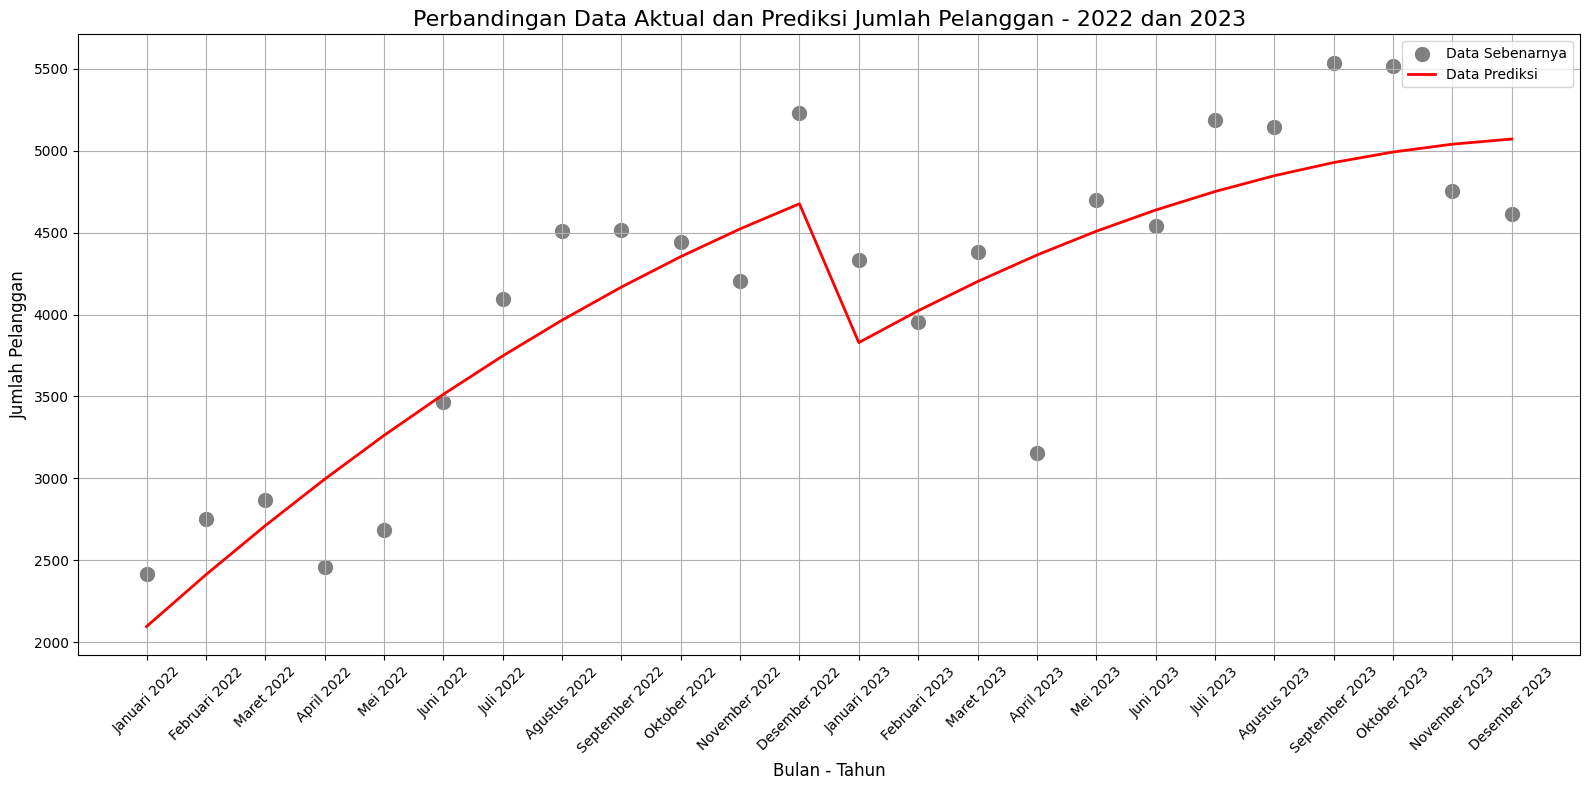

In [16]:
# Menyiapkan label bulan untuk tahun 2022 dan 2023
x_labels = [f'{month_names[month-1]} 2022' for month in df_2022['Bulan']] + \
           [f'{month_names[month-1]} 2023' for month in df_2023['Bulan']]

# Gabungkan data untuk kedua tahun
bulan_all = list(df_2022['Bulan']) + list(df_2023['Bulan'] + 12)  # Offset bulan 2023 agar berlanjut setelah 2022
data_sebenarnya_all = list(df_2022['Data Sebenarnya']) + list(df_2023['Data Sebenarnya'])
data_prediksi_all = list(df_2022['Data Prediksi']) + list(df_2023['Data Prediksi'])

# Membuat plot gabungan
plt.figure(figsize=(16, 8))
plt.scatter(bulan_all, data_sebenarnya_all, color='gray', label='Data Sebenarnya', s=100)
plt.plot(bulan_all, data_prediksi_all, label='Data Prediksi', color='red', linewidth=2)
plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2022 dan 2023', fontsize=16)
plt.xlabel('Bulan - Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(ticks=range(1, len(x_labels) + 1), labels=x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Prediksi bandwith berdasarkan jumlah pelanggan

   Tahun  Data Bandwidth  Jumlah Pelanggan
0   2022              10             17468
1   2022              20             22059
2   2022              50              3406
3   2022             100               710
4   2023              10             11891
5   2023              20             25565
6   2023              35             13371
7   2023              50              4015
8   2023             100               987


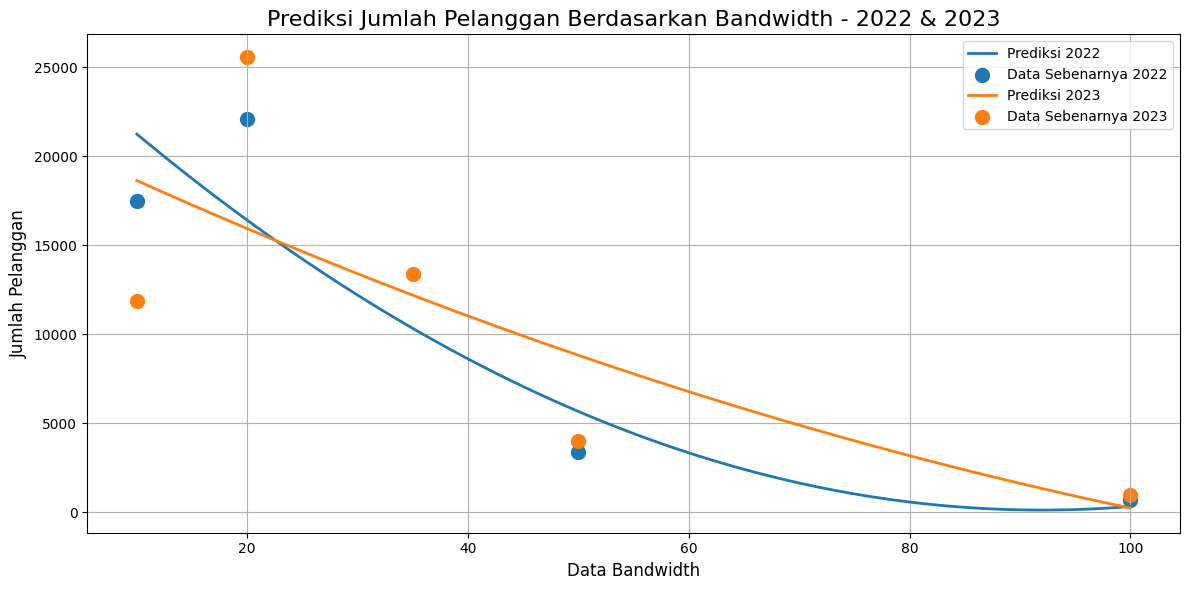


Tabel Prediksi dan Data Sebenarnya:
   Tahun  Data Bandwidth  Jumlah Pelanggan  Prediksi Jumlah Pelanggan
0   2022              10             17468               21238.138122
1   2022              20             22059               16403.792818
2   2022              50              3406                5668.082873
3   2022             100               710                 332.986188
4   2023              10             11891               18630.694757
5   2023              20             25565               15933.445475
6   2023              35             13371               12194.415114
7   2023              50              4015                8823.597030
8   2023             100               987                 246.847625

Metrik Evaluasi Keseluruhan:
RMSE: 4884.21
MAE: 3906.78
MAPE: 51.63%

Metrik Evaluasi Per Tahun:
   Tahun         RMSE          MAE       MAPE
0   2022  3586.588493  3016.110497  41.683758
1   2023  5713.932287  4619.316715  59.581833


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Misalkan df sudah berisi kolom 'YEAR' yang menunjukkan tahun
# Mengelompokkan data berdasarkan tahun dan bandwidth, menghitung jumlah pelanggan
bandwidth_year_data = df.groupby(['YEAR', 'BW'])['Kode Wilayah'].count().reset_index()
bandwidth_year_data.columns = ['Tahun', 'Data Bandwidth', 'Jumlah Pelanggan']

# Menampilkan tabel jumlah pelanggan berdasarkan bandwidth per tahun
print(bandwidth_year_data)

# Menyimpan hasil prediksi untuk setiap tahun
predictions = []

# Menyimpan metrik evaluasi untuk setiap tahun
evaluation_metrics = []

# Menyiapkan plot gabungan
plt.figure(figsize=(12, 6))


# Melakukan loop untuk setiap tahun
for year in bandwidth_year_data['Tahun'].unique():
    year_data = bandwidth_year_data[bandwidth_year_data['Tahun'] == year]
    if year_data.empty:
        continue  # Lewati jika tidak ada data untuk tahun ini

    # Menggunakan seluruh data untuk melatih model
    X = year_data[['Data Bandwidth']].values  # Fitur bandwidth
    y = year_data['Jumlah Pelanggan'].values    # Target (jumlah pelanggan)

    # Normalisasi fitur (standard scaling)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Menciptakan fitur polynomial
    poly = PolynomialFeatures(degree=2)  # Bisa mencoba degree yang lebih tinggi jika perlu
    X_poly_scaled = poly.fit_transform(X_scaled)

    # Membuat dan melatih model regresi linear polinomial
    model_poly = LinearRegression()
    model_poly.fit(X_poly_scaled, y)

    # Melakukan prediksi untuk tahun ini
    y_pred = model_poly.predict(X_poly_scaled)

    # Menyimpan hasil prediksi ke dalam list
    for i in range(len(year_data)):
        predictions.append({
            'Tahun': year,
            'Data Bandwidth': year_data.iloc[i]['Data Bandwidth'],
            'Jumlah Pelanggan': year_data.iloc[i]['Jumlah Pelanggan'],
            'Prediksi Jumlah Pelanggan': y_pred[i]
        })

    # Menghitung metrik evaluasi untuk tahun ini
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    evaluation_metrics.append({
        'Tahun': year,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    })

    # Melakukan prediksi untuk semua bandwidth yang ada
    all_bandwidths = np.linspace(year_data['Data Bandwidth'].min(), year_data['Data Bandwidth'].max(), 100).reshape(-1, 1)
    all_bandwidths_scaled = scaler.transform(all_bandwidths)  # Normalisasi data
    all_bandwidths_poly = poly.transform(all_bandwidths_scaled)

    # # Melakukan prediksi jumlah pelanggan untuk semua bandwidth
    # prediksi_pelanggan = model_poly.predict(all_bandwidths_poly)

    # # Membuat plot untuk prediksi jumlah pelanggan berdasarkan bandwidth per tahun
    # plt.figure(figsize=(12, 6))
    # plt.plot(all_bandwidths, prediksi_pelanggan, color='red', linewidth=2, label='Prediksi Jumlah Pelanggan')
    # plt.scatter(year_data['Data Bandwidth'], year_data['Jumlah Pelanggan'], color='blue', label='Data Sebenarnya', s=100)

    # # Menambahkan judul dan label
    # plt.title(f'Prediksi Jumlah Pelanggan Berdasarkan Bandwidth - {year}', fontsize=16)
    # plt.xlabel('Data Bandwidth', fontsize=12)
    # plt.ylabel('Jumlah Pelanggan', fontsize=12)

    # # Menambahkan grid dan legenda
    # plt.grid()
    # plt.legend()

    # # Menampilkan grafik
    # plt.tight_layout()
    # plt.show()

    # Melakukan prediksi jumlah pelanggan untuk semua bandwidth
    prediksi_pelanggan = model_poly.predict(all_bandwidths_poly)

    # Plot data prediksi untuk tahun ini
    plt.plot(all_bandwidths, prediksi_pelanggan, label=f'Prediksi {year}', linewidth=2)

    # Scatter plot data sebenarnya untuk tahun ini
    plt.scatter(year_data['Data Bandwidth'], year_data['Jumlah Pelanggan'], label=f'Data Sebenarnya {year}', s=100)


# Menambahkan judul dan label
plt.title('Prediksi Jumlah Pelanggan Berdasarkan Bandwidth - 2022 & 2023', fontsize=16)
plt.xlabel('Data Bandwidth', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menambahkan grid dan legenda
plt.grid()
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


# Mengonversi hasil prediksi ke dalam DataFrame
predictions_df = pd.DataFrame(predictions)

# Menampilkan tabel akhir: Data Sebenarnya dan Data Prediksi
print("\nTabel Prediksi dan Data Sebenarnya:")
print(predictions_df)

# Menghitung dan menampilkan metrik evaluasi keseluruhan
overall_rmse = np.sqrt(mean_squared_error(predictions_df['Jumlah Pelanggan'], predictions_df['Prediksi Jumlah Pelanggan']))
overall_mae = mean_absolute_error(predictions_df['Jumlah Pelanggan'], predictions_df['Prediksi Jumlah Pelanggan'])
overall_mape = np.mean(np.abs((predictions_df['Jumlah Pelanggan'] - predictions_df['Prediksi Jumlah Pelanggan']) / predictions_df['Jumlah Pelanggan'])) * 100

print("\nMetrik Evaluasi Keseluruhan:")
print(f"RMSE: {overall_rmse:.2f}")
print(f"MAE: {overall_mae:.2f}")
print(f"MAPE: {overall_mape:.2f}%")

# Menampilkan metrik evaluasi per tahun
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)
print("\nMetrik Evaluasi Per Tahun:")
print(evaluation_metrics_df)


## Prediksi wilayah berdasarkan jumlah pelanggan

    KODE_WILAYAH  YEAR  Jumlah Pelanggan
0              1  2022            155010
2              2  2022            171280
4              3  2022            244690
6              4  2022            188640
8              5  2022             34840
10             6  2022             62700
1              1  2023            247275
3              2  2023            203285
5              3  2023            241700
7              4  2023            410180
9              5  2023             80855
11             6  2023            214350


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

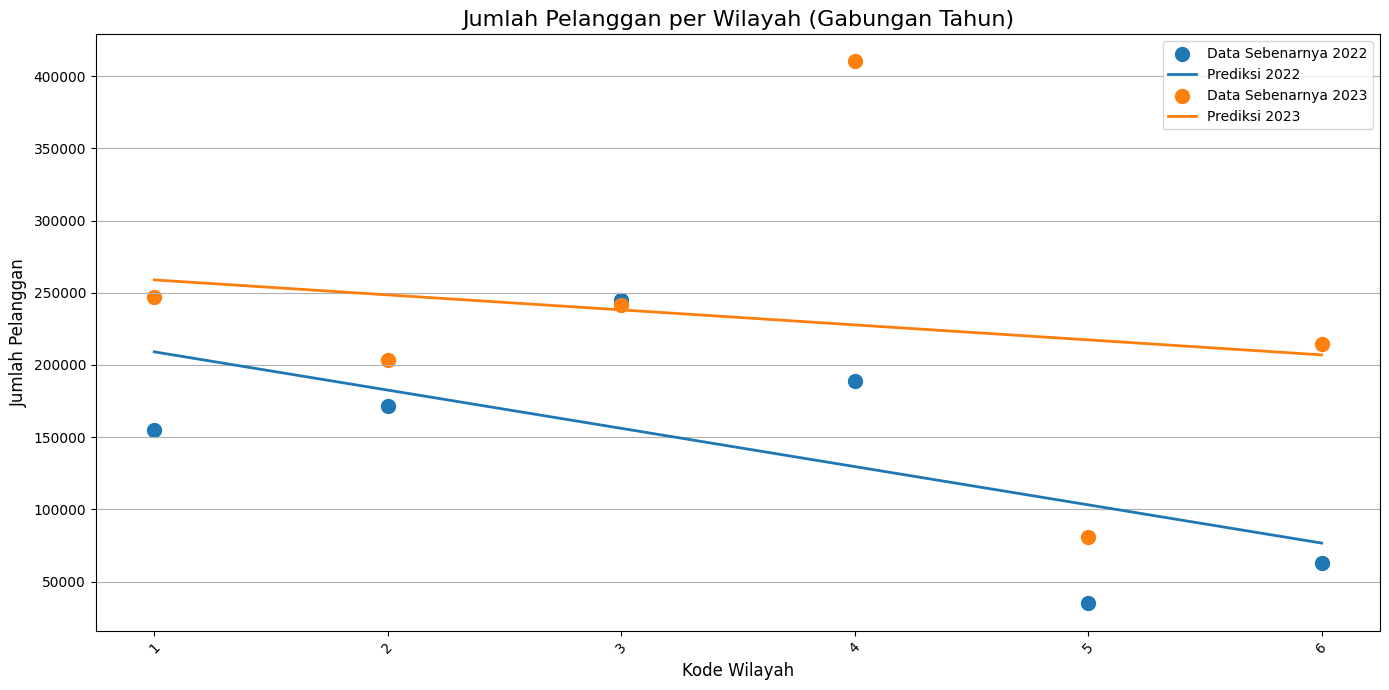

RMSE untuk tahun 2022: 56628.04
MAE untuk tahun 2022: 49203.33
MAPE untuk tahun 2022: 54.54%

RMSE untuk tahun 2023: 95012.43
MAE untuk tahun 2023: 64455.71
MAPE untuk tahun 2023: 40.86%

Metrik Evaluasi Keseluruhan:
RMSE: 78211.56
MAE: 56829.52
MAPE: 47.70%


Tabel Hasil Prediksi:
    YEAR  KODE_WILAYAH  Jumlah Pelanggan  Prediksi Jumlah Pelanggan
0   2022             1            155010              209068.571429
1   2022             2            171280              182585.142857
2   2022             3            244690              156101.714286
3   2022             4            188640              129618.285714
4   2022             5             34840              103134.857143
5   2022             6             62700               76651.428571
6   2023             1            247275              258900.476190
7   2023             2            203285              248516.619048
8   2023             3            241700              238132.761905
9   2023             4            410

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mengubah Kode Wilayah menjadi integer
df['KODE_WILAYAH'] = df['Kode Wilayah'].astype(int)

# Mengelompokkan data berdasarkan Kode Wilayah dan Tahun, menghitung jumlah pelanggan
grouped_data = df.groupby(['KODE_WILAYAH', 'YEAR']).agg({'BW': 'sum'}).reset_index()
grouped_data.rename(columns={'BW': 'Jumlah Pelanggan'}, inplace=True)

# Mengurutkan data berdasarkan tahun
grouped_data.sort_values(by=['YEAR'], inplace=True)

# Menampilkan hasil grouped_data
print(grouped_data)

# Daftar tahun yang unik
unique_years = grouped_data['YEAR'].unique()

# Menyimpan hasil metrik
metrics = {}
results = []

# Variabel tampungan untuk data plot gabungan
all_years_plot_data = []

# Membuat plot dan prediksi untuk setiap tahun secara terpisah
for year in unique_years:
    plt.figure(figsize=(12, 6))

    # Mengambil data untuk tahun tertentu
    df_year = grouped_data[grouped_data['YEAR'] == year]

    # Menyiapkan fitur dan target untuk tahun ini
    X_year = df_year['KODE_WILAYAH'].values.reshape(-1, 1)  # Fitur (kode wilayah)
    y_year = df_year['Jumlah Pelanggan'].values  # Target (jumlah pelanggan)

    # Membuat dan melatih model regresi linier untuk tahun ini
    model = LinearRegression()
    model.fit(X_year, y_year)

    # Melakukan prediksi untuk tahun ini
    y_pred = model.predict(X_year)

    # Menyimpan hasil prediksi ke dalam DataFrame
    results.append(pd.DataFrame({
        'YEAR': year,
        'KODE_WILAYAH': df_year['KODE_WILAYAH'],
        'Jumlah Pelanggan': df_year['Jumlah Pelanggan'],
        'Prediksi Jumlah Pelanggan': y_pred
    }))

    # Menghitung metrik evaluasi untuk tahun ini
    rmse = np.sqrt(mean_squared_error(y_year, y_pred))
    mae = mean_absolute_error(y_year, y_pred)
    mape = np.mean(np.abs((y_year - y_pred) / y_year)) * 100

    # Menyimpan metrik dalam dictionary
    metrics[year] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

        # Menyimpan data untuk plot gabungan
    all_years_plot_data.append({
        'year': year,
        'X': df_year['KODE_WILAYAH'].astype(str),  # KODE_WILAYAH sebagai kategori
        'y_true': y_year,
        'y_pred': y_pred
    })



    # # Menambahkan garis regresi ke grafik
    # plt.plot(df_year['KODE_WILAYAH'].astype(str), y_pred, color='red', linewidth=2, label='Prediksi Jumlah Pelanggan')
    # plt.scatter(df_year['KODE_WILAYAH'].astype(str), df_year['Jumlah Pelanggan'], color='blue', label='Data Sebenarnya', s=100)

    # # Menambahkan judul dan label
    # plt.title(f'Jumlah Pelanggan per Wilayah pada Tahun {year}', fontsize=16)
    # plt.xlabel('Kode Wilayah', fontsize=12)
    # plt.ylabel('Jumlah Pelanggan', fontsize=12)

    # plt.xticks(rotation=45)
    # plt.grid(axis='y')
    # plt.legend()

    # # Menampilkan grafik
    # plt.tight_layout()
    # plt.show()

# Membuat plot gabungan untuk semua tahun
plt.figure(figsize=(14, 7))

# Iterasi untuk menambahkan data masing-masing tahun ke dalam grafik
for plot_data in all_years_plot_data:
    year = plot_data['year']
    X = plot_data['X']
    y_true = plot_data['y_true']
    y_pred = plot_data['y_pred']

    # Menambahkan data sebenarnya
    plt.scatter(X, y_true, label=f'Data Sebenarnya {year}', s=100)

    # Menambahkan garis regresi
    plt.plot(X, y_pred, label=f'Prediksi {year}', linewidth=2)

# Menambahkan judul dan label
plt.title('Jumlah Pelanggan per Wilayah (Gabungan Tahun)', fontsize=16)
plt.xlabel('Kode Wilayah', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Rotasi label pada sumbu X untuk kejelasan
plt.xticks(rotation=45)

# Menambahkan grid dan legenda
plt.grid(axis='y')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()



# Menggabungkan semua hasil prediksi ke dalam satu DataFrame
results_df = pd.concat(results, ignore_index=True)

# Menampilkan hasil metrik evaluasi untuk setiap tahun
for year, metric in metrics.items():
    print(f"RMSE untuk tahun {year}: {metric['RMSE']:.2f}")
    print(f"MAE untuk tahun {year}: {metric['MAE']:.2f}")
    print(f"MAPE untuk tahun {year}: {metric['MAPE']:.2f}%\n")

# Menghitung metrik evaluasi keseluruhan
X_all = results_df['KODE_WILAYAH'].values.reshape(-1, 1)
y_all = results_df['Jumlah Pelanggan'].values
y_pred_all = results_df['Prediksi Jumlah Pelanggan'].values

overall_rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))
overall_mae = mean_absolute_error(y_all, y_pred_all)
overall_mape = np.mean(np.abs((y_all - y_pred_all) / y_all)) * 100

# Menampilkan metrik evaluasi keseluruhan
print("Metrik Evaluasi Keseluruhan:")
print(f"RMSE: {overall_rmse:.2f}")
print(f"MAE: {overall_mae:.2f}")
print(f"MAPE: {overall_mape:.2f}%\n")

# Menampilkan tabel hasil prediksi
print("\nTabel Hasil Prediksi:")
print(results_df)


# **Random Forest**

## Prediksi jumlah pelanggan berdasarkan bulan

<ipython-input-24-a5c693703620>:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hasil['Data Sebenarnya'].fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0 untuk bulan yang tidak ada


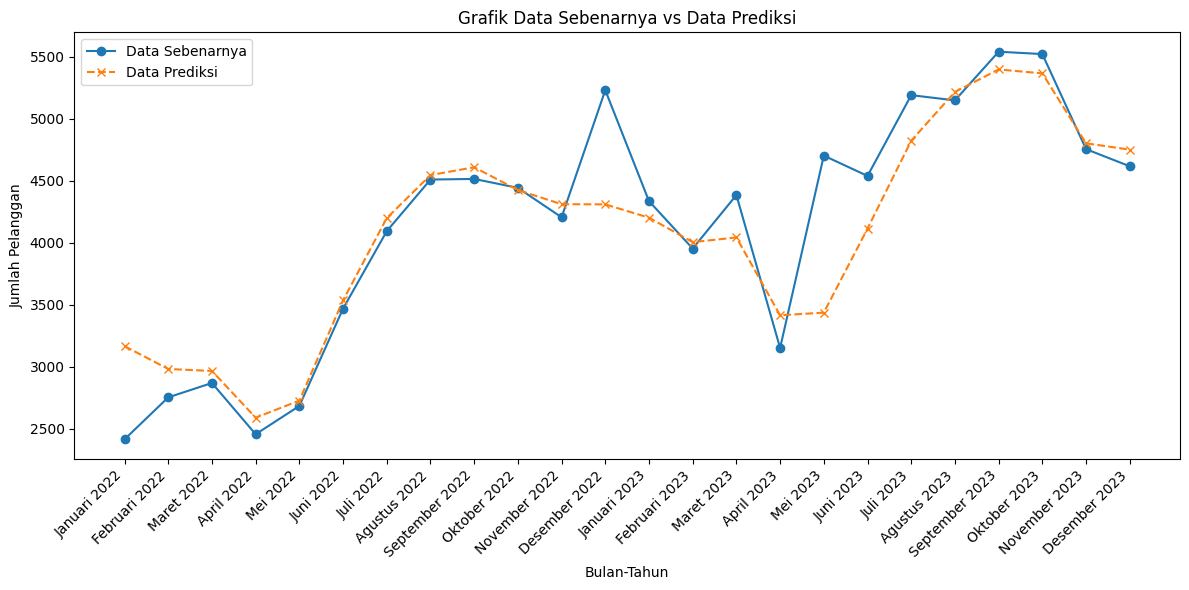

Tabel Data Sebenarnya dan Data Prediksi:
    Tahun  Bulan  Data Sebenarnya  Data Prediksi
0    2022      1             2416        3166.58
2    2022      2             2754        2982.90
4    2022      3             2870        2966.72
6    2022      4             2457        2590.52
8    2022      5             2685        2727.95
10   2022      6             3469        3535.59
12   2022      7             4093        4198.50
14   2022      8             4509        4544.89
16   2022      9             4514        4608.04
18   2022     10             4442        4424.50
20   2022     11             4205        4310.38
22   2022     12             5229        4308.97
1    2023      1             4335        4201.84
3    2023      2             3953        4004.64
5    2023      3             4384        4042.57
7    2023      4             3152        3415.56
9    2023      5             4702        3436.70
11   2023      6             4538        4113.89
13   2023      7            

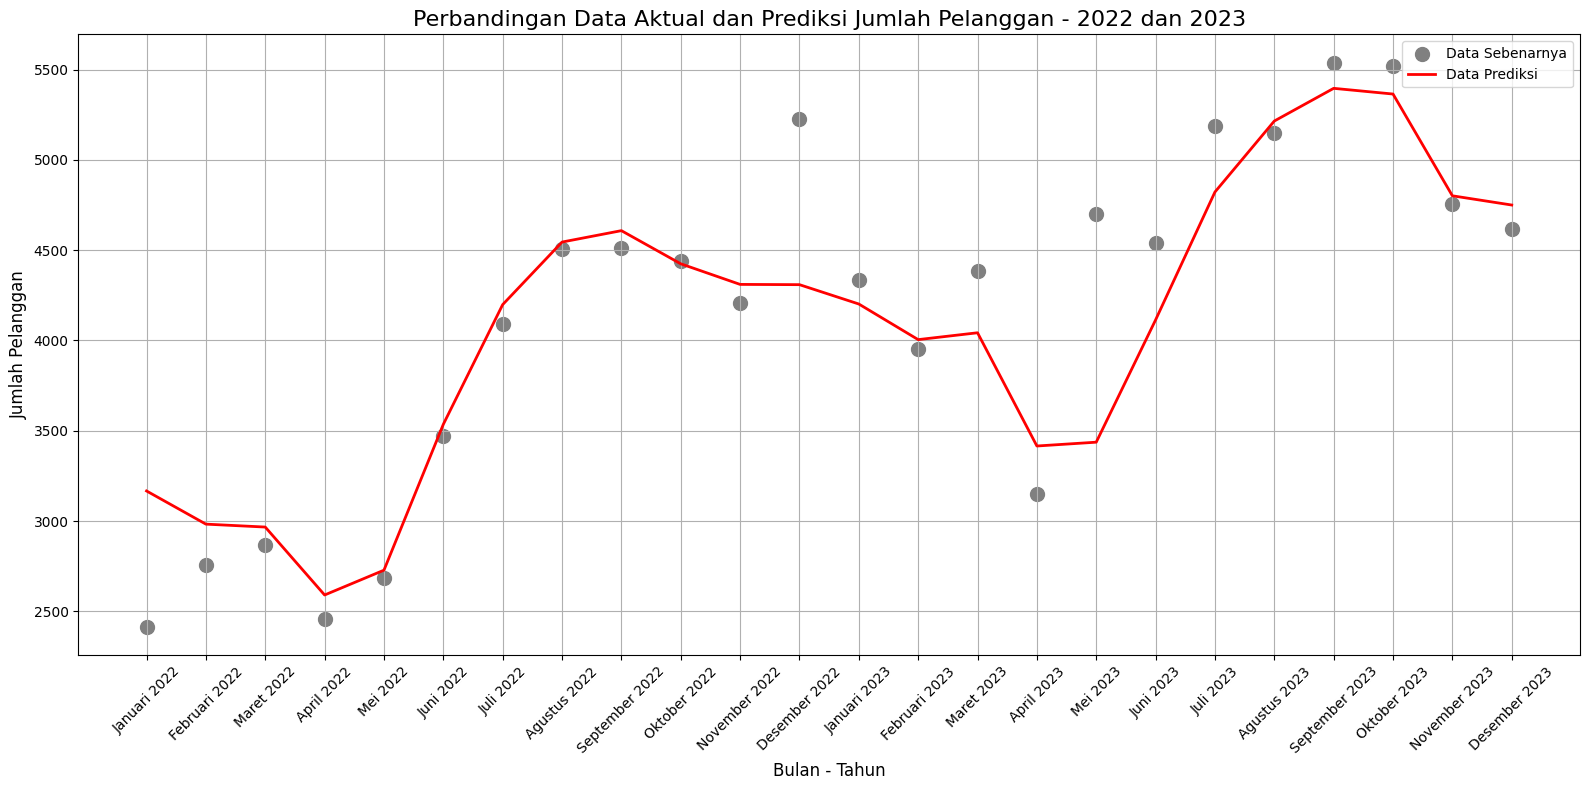

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan bulan dan tahun, menghitung jumlah pelanggan
customer_per_month = df.groupby(['YEAR', 'MONTH'])['Kode Wilayah'].count().reset_index()
customer_per_month.columns = ['Tahun', 'Bulan', 'Data Sebenarnya']

# Mengurutkan data berdasarkan tahun dan bulan
customer_per_month.sort_values(by=['Tahun', 'Bulan'], inplace=True)

# Memisahkan fitur (bulan dan tahun) dan target (jumlah pelanggan)
X = customer_per_month[['Tahun', 'Bulan']].values  # Fitur gabungan Tahun dan Bulan
y = customer_per_month['Data Sebenarnya'].values    # Target (jumlah pelanggan)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur (standard scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data pengujian
y_pred_test = model_rf.predict(X_test_scaled)

# Menghitung metrik evaluasi
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Melakukan prediksi pada semua bulan di tahun 2022 dan 2023
all_years = np.tile([2022, 2023], 12)  # Tahun 2022 dan 2023
all_months = np.repeat(np.arange(1, 13), 2)  # Bulan 1 hingga 12 di kedua tahun
all_data = np.column_stack((all_years, all_months))
all_data_scaled = scaler.transform(all_data)  # Normalisasi data

# Prediksi pada semua bulan dan tahun
prediksi = model_rf.predict(all_data_scaled)

# Membuat DataFrame untuk menampilkan prediksi
df_prediksi = pd.DataFrame({
    'Tahun': all_years,
    'Bulan': all_months,
    'Data Prediksi': prediksi
})

# Menggabungkan prediksi dengan data sebenarnya
df_hasil = pd.merge(df_prediksi, customer_per_month, how='left', on=['Tahun', 'Bulan'])

# Menampilkan tabel hasil prediksi dan data sebenarnya
df_hasil['Data Sebenarnya'].fillna(0, inplace=True)  # Mengisi nilai yang hilang dengan 0 untuk bulan yang tidak ada

# Mengurutkan data berdasarkan tahun dan bulan
df_hasil.sort_values(by=['Tahun', 'Bulan'], inplace=True)

# Memastikan kolom 'Bulan' adalah integer
df_hasil['Bulan'] = df_hasil['Bulan'].astype(int)

# Memastikan kolom 'Tahun' adalah integer
df_hasil['Tahun'] = df_hasil['Tahun'].astype(int)

# Mengubah angka bulan menjadi nama bulan
month_names = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Menyiapkan sumbu x (kombinasi Nama Bulan dan Tahun)
x_labels = [f'{month_names[int(row["Bulan"]) - 1]} {int(row["Tahun"])}' for _, row in df_hasil.iterrows()]

# Membuat plot
plt.figure(figsize=(12, 6))

# Plot data sebenarnya
plt.plot(x_labels, df_hasil['Data Sebenarnya'], label='Data Sebenarnya', marker='o')

# Plot data prediksi
plt.plot(x_labels, df_hasil['Data Prediksi'], label='Data Prediksi', linestyle='--', marker='x')

# Menambahkan judul dan label
plt.title('Grafik Data Sebenarnya vs Data Prediksi')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menampilkan tabel data sebenarnya dan data prediksi
print("Tabel Data Sebenarnya dan Data Prediksi:")
print(df_hasil[['Tahun', 'Bulan', 'Data Sebenarnya', 'Data Prediksi']])


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


# Memisahkan data berdasarkan tahun
df_2022 = df_hasil[df_hasil['Tahun'] == 2022]
df_2023 = df_hasil[df_hasil['Tahun'] == 2023]

# Menyiapkan label bulan untuk tahun 2022
x_labels_2022 = [f'{month_names[month-1]} 2022' for month in df_2022['Bulan']]

# # Membuat plot untuk tahun 2022
# plt.figure(figsize=(12, 6))
# plt.scatter(df_2022['Bulan'], df_2022['Data Sebenarnya'], color='gray', label='Data Sebenarnya', s=100)
# plt.plot(df_2022['Bulan'], df_2022['Data Prediksi'], label='Data Prediksi', color='red', linewidth=2)
# plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2022', fontsize=16)
# plt.xlabel('Bulan - Tahun', fontsize=12)
# plt.ylabel('Jumlah Pelanggan', fontsize=12)
# plt.xticks(df_2022['Bulan'], x_labels_2022, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.grid(True)
# plt.show()

# # Menyiapkan label bulan untuk tahun 2023
# x_labels_2023 = [f'{month_names[month-1]} 2023' for month in df_2023['Bulan']]

# # Membuat plot untuk tahun 2023
# plt.figure(figsize=(12, 6))
# plt.scatter(df_2023['Bulan'], df_2023['Data Sebenarnya'], color='gray', label='Data Sebenarnya', s=100)
# plt.plot(df_2023['Bulan'], df_2023['Data Prediksi'], label='Data Prediksi', color='red', linewidth=2)
# plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2023', fontsize=16)
# plt.xlabel('Bulan - Tahun', fontsize=12)
# plt.ylabel('Jumlah Pelanggan', fontsize=12)
# plt.xticks(df_2023['Bulan'], x_labels_2023, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.grid(True)
# plt.show()


# Menyiapkan label bulan untuk tahun 2022 dan 2023
x_labels = [f'{month_names[month-1]} 2022' for month in df_2022['Bulan']] + \
           [f'{month_names[month-1]} 2023' for month in df_2023['Bulan']]

# Gabungkan data untuk kedua tahun
bulan_all = list(df_2022['Bulan']) + list(df_2023['Bulan'] + 12)  # Offset bulan 2023 agar berlanjut setelah 2022
data_sebenarnya_all = list(df_2022['Data Sebenarnya']) + list(df_2023['Data Sebenarnya'])
data_prediksi_all = list(df_2022['Data Prediksi']) + list(df_2023['Data Prediksi'])

# Membuat plot gabungan
plt.figure(figsize=(16, 8))
plt.scatter(bulan_all, data_sebenarnya_all, color='gray', label='Data Sebenarnya', s=100)
plt.plot(bulan_all, data_prediksi_all, label='Data Prediksi', color='red', linewidth=2)
plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2022 dan 2023', fontsize=16)
plt.xlabel('Bulan - Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(ticks=range(1, len(x_labels) + 1), labels=x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


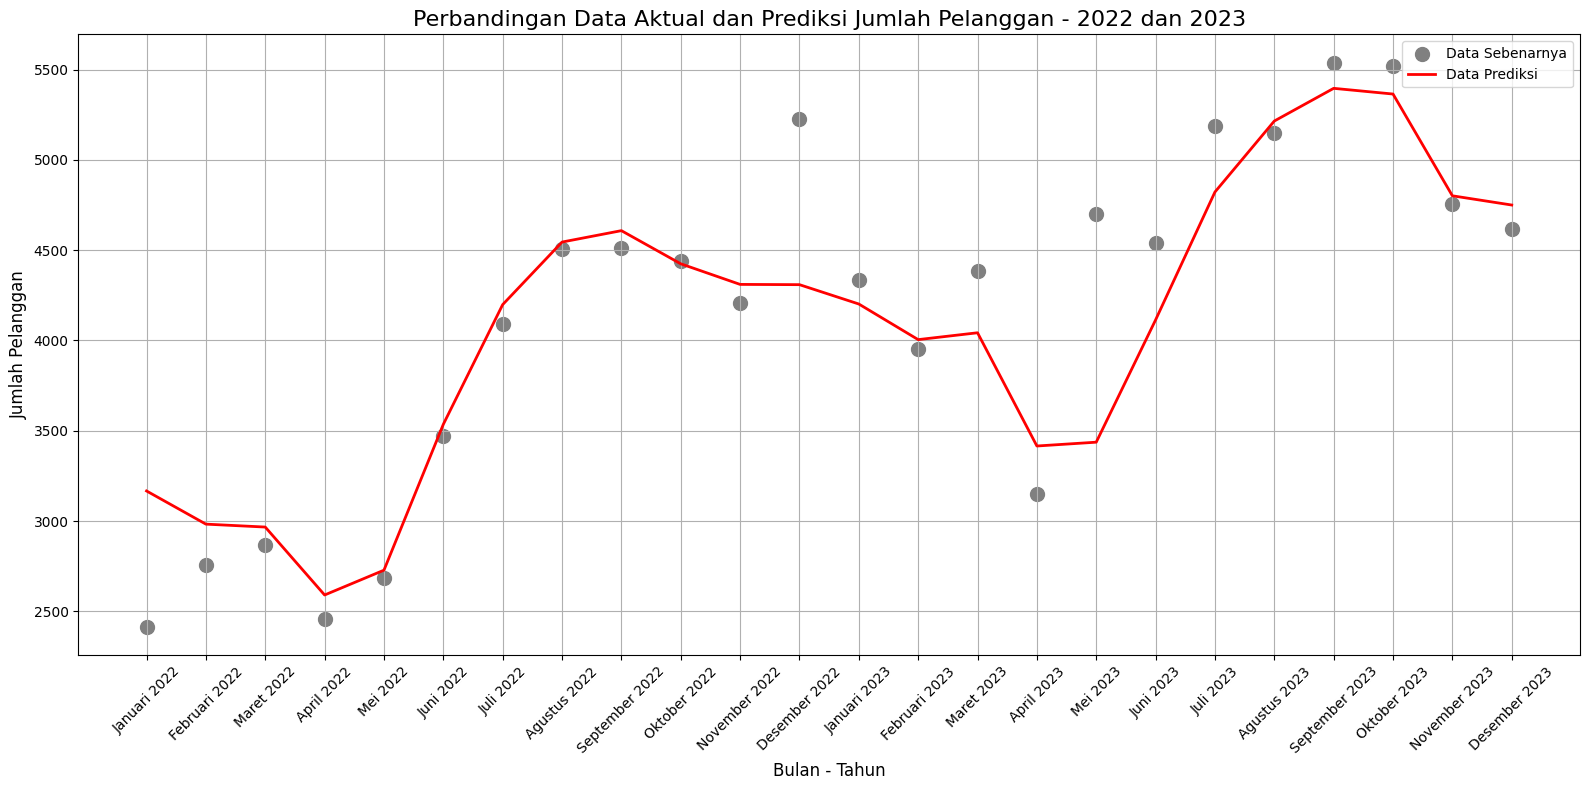

In [23]:
# Menyiapkan label bulan untuk tahun 2022 dan 2023
x_labels = [f'{month_names[month-1]} 2022' for month in df_2022['Bulan']] + \
           [f'{month_names[month-1]} 2023' for month in df_2023['Bulan']]

# Gabungkan data untuk kedua tahun
bulan_all = list(df_2022['Bulan']) + list(df_2023['Bulan'] + 12)  # Offset bulan 2023 agar berlanjut setelah 2022
data_sebenarnya_all = list(df_2022['Data Sebenarnya']) + list(df_2023['Data Sebenarnya'])
data_prediksi_all = list(df_2022['Data Prediksi']) + list(df_2023['Data Prediksi'])

# Membuat plot gabungan
plt.figure(figsize=(16, 8))
plt.scatter(bulan_all, data_sebenarnya_all, color='gray', label='Data Sebenarnya', s=100)
plt.plot(bulan_all, data_prediksi_all, label='Data Prediksi', color='red', linewidth=2)
plt.title('Perbandingan Data Aktual dan Prediksi Jumlah Pelanggan - 2022 dan 2023', fontsize=16)
plt.xlabel('Bulan - Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(ticks=range(1, len(x_labels) + 1), labels=x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Prediksi bandwith berdasarkan jumlah pelanggan

   Tahun  Data Bandwidth  Jumlah Pelanggan
0   2022              10             17468
1   2022              20             22059
2   2022              50              3406
3   2022             100               710
4   2023              10             11891
5   2023              20             25565
6   2023              35             13371
7   2023              50              4015
8   2023             100               987

Metrik Evaluasi untuk Tahun 2022:
RMSE: 860.20, MAPE: 26.61%, MAE: 733.80

Metrik Evaluasi untuk Tahun 2023:
RMSE: 2680.23, MAPE: 22.57%, MAE: 2251.70


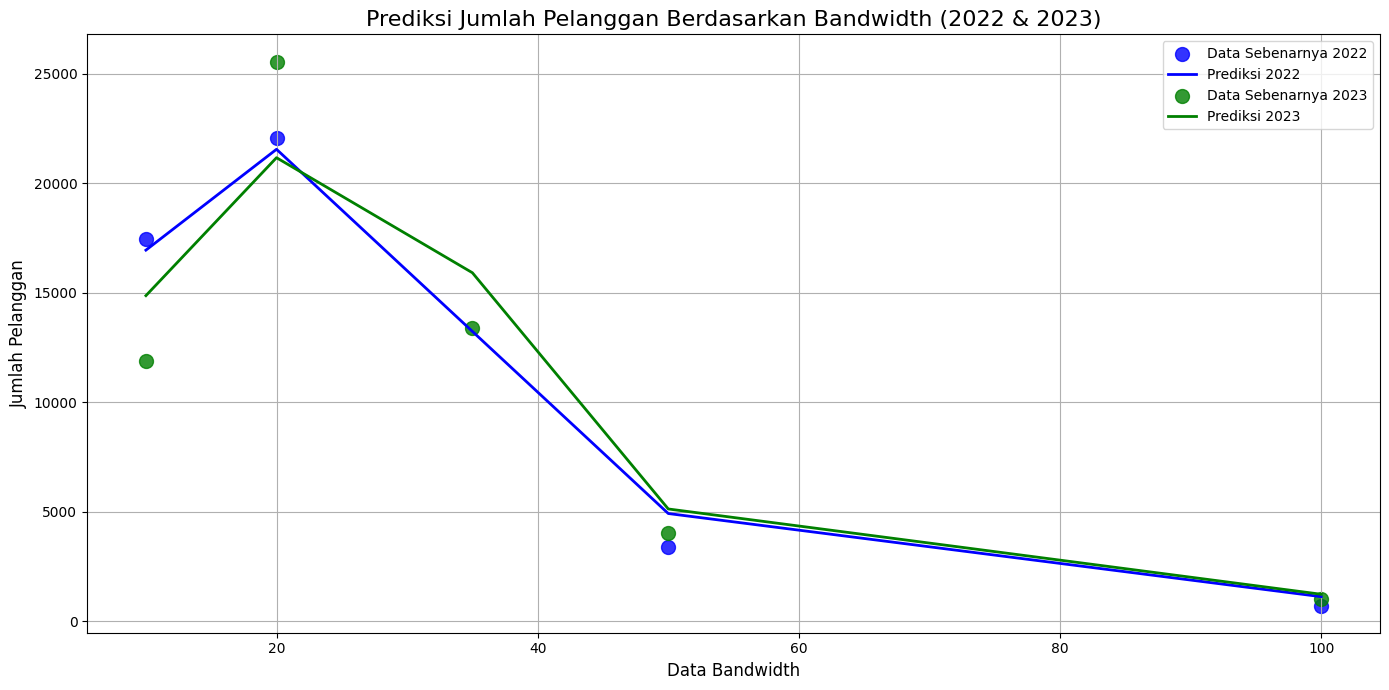

Tabel Prediksi dan Data Sebenarnya:
   Tahun  Data Bandwidth  Data Sebenarnya  Prediksi Jumlah Pelanggan
0   2022              10            17468                   16948.03
1   2022              20            22059                   21555.28
2   2022              50             3406                    4913.47
3   2022             100              710                    1114.02
4   2023              10            11891                   14868.42
5   2023              20            25565                   21171.40
6   2023              35            13371                   15914.18
7   2023              50             4015                    5121.88
8   2023             100              987                    1224.44

Metrik Evaluasi Keseluruhan:
RMSE: 2078.40, MAPE: 24.37%, MAE: 1577.08


In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

# Misalkan df sudah berisi kolom 'YEAR' yang menunjukkan tahun
# Mengelompokkan data berdasarkan tahun dan bandwidth, menghitung jumlah pelanggan
bandwidth_year_data = df.groupby(['YEAR', 'BW'])['Kode Wilayah'].count().reset_index()
bandwidth_year_data.columns = ['Tahun', 'Data Bandwidth', 'Jumlah Pelanggan']

# Menampilkan tabel jumlah pelanggan berdasarkan bandwidth per tahun
print(bandwidth_year_data)

# Menambahkan kolom tahun ke fitur
bandwidth_year_data['Year'] = bandwidth_year_data['Tahun']
X = bandwidth_year_data[['Data Bandwidth', 'Year']].values  # Fitur bandwidth dan tahun
y = bandwidth_year_data['Jumlah Pelanggan'].values    # Target (jumlah pelanggan)

# Normalisasi fitur (standard scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membuat dan melatih model Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_scaled, y)

# Menyimpan hasil prediksi dalam list dan DataFrame untuk metrik keseluruhan
results = []
all_actuals = []  # Untuk menyimpan semua data sebenarnya
all_predictions = []  # Untuk menyimpan semua prediksi

# Variabel tampungan untuk grafik gabungan
combined_plot_data = []


# Melakukan prediksi untuk setiap tahun
for year in bandwidth_year_data['Tahun'].unique():
    year_data = bandwidth_year_data[bandwidth_year_data['Tahun'] == year]
    if year_data.empty:
        continue  # Lewati jika tidak ada data untuk tahun ini

    # Prediksi untuk semua bandwidth yang ada di tahun ini
    unique_bandwidths = year_data['Data Bandwidth'].unique().reshape(-1, 1)

    # Menggabungkan dengan tahun
    unique_bandwidths_year = np.column_stack((unique_bandwidths, np.full(unique_bandwidths.shape, year)))  # Menambahkan kolom tahun
    unique_bandwidths_scaled = scaler.transform(unique_bandwidths_year)  # Normalisasi data

    # Melakukan prediksi jumlah pelanggan untuk semua bandwidth yang ada
    prediksi_pelanggan = model_rf.predict(unique_bandwidths_scaled)

    # Membuat DataFrame untuk menampilkan data sebenarnya dan prediksi
    prediksi_df = pd.DataFrame({
        'Data Bandwidth': unique_bandwidths.flatten(),
        'Prediksi Jumlah Pelanggan': prediksi_pelanggan
    })

    # Menggabungkan dengan data sebenarnya untuk tahun ini
    actual_data = year_data[['Data Bandwidth', 'Jumlah Pelanggan']].copy()
    actual_data.rename(columns={'Jumlah Pelanggan': 'Data Sebenarnya'}, inplace=True)

    # Menggabungkan prediksi dan data sebenarnya
    combined_df = pd.merge(prediksi_df, actual_data, on='Data Bandwidth', how='left')
    combined_df['Tahun'] = year  # Menambahkan kolom tahun

    # Menyimpan hasil untuk grafik gabungan
    combined_plot_data.append({
        'year': year,
        'data_bandwidth': combined_df['Data Bandwidth'],
        'actuals': combined_df['Data Sebenarnya'],
        'predictions': combined_df['Prediksi Jumlah Pelanggan']
    })

    # Menyimpan hasil ke dalam list
    results.append(combined_df)

    # Menyimpan data sebenarnya dan prediksi untuk metrik keseluruhan
    all_actuals.extend(combined_df['Data Sebenarnya'])
    all_predictions.extend(combined_df['Prediksi Jumlah Pelanggan'])

    # Menghitung metrik evaluasi per tahun
    rmse = np.sqrt(mean_squared_error(combined_df['Data Sebenarnya'], combined_df['Prediksi Jumlah Pelanggan']))
    mape = mean_absolute_percentage_error(combined_df['Data Sebenarnya'], combined_df['Prediksi Jumlah Pelanggan'])
    mae = mean_absolute_error(combined_df['Data Sebenarnya'], combined_df['Prediksi Jumlah Pelanggan'])

    # Menampilkan Metrik
    print(f'\nMetrik Evaluasi untuk Tahun {year}:')
    print(f'RMSE: {rmse:.2f}, MAPE: {mape:.2%}, MAE: {mae:.2f}')

    # # Membuat plot untuk prediksi jumlah pelanggan berdasarkan bandwidth per tahun
    # plt.figure(figsize=(12, 6))
    # plt.plot(prediksi_df['Data Bandwidth'], prediksi_df['Prediksi Jumlah Pelanggan'], color='red', linewidth=2, label='Prediksi Jumlah Pelanggan')
    # plt.scatter(year_data['Data Bandwidth'], year_data['Jumlah Pelanggan'], color='blue', label='Data Sebenarnya', s=100)

    # # Menambahkan judul dan label
    # plt.title(f'Prediksi Jumlah Pelanggan Berdasarkan Bandwidth - {year}', fontsize=16)
    # plt.xlabel('Data Bandwidth', fontsize=12)
    # plt.ylabel('Jumlah Pelanggan', fontsize=12)

    # # Menambahkan grid dan legenda
    # plt.grid()
    # plt.legend()

    # # Menampilkan grafik
    # plt.tight_layout()
    # plt.show()

# Membuat grafik gabungan untuk tahun 2022 dan 2023
plt.figure(figsize=(14, 7))
colors = {2022: 'blue', 2023: 'green'}  # Warna untuk setiap tahun

# Menambahkan data dan prediksi untuk masing-masing tahun
for data in combined_plot_data:
    if data['year'] in [2022, 2023]:  # Hanya tahun 2022 dan 2023
        plt.scatter(data['data_bandwidth'], data['actuals'], label=f'Data Sebenarnya {data["year"]}', s=100, alpha=0.8, color=colors[data['year']])
        plt.plot(data['data_bandwidth'], data['predictions'], label=f'Prediksi {data["year"]}', linewidth=2, color=colors[data['year']])

# Menambahkan judul, label, dan legenda
plt.title('Prediksi Jumlah Pelanggan Berdasarkan Bandwidth (2022 & 2023)', fontsize=16)
plt.xlabel('Data Bandwidth', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.grid()
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


# Menggabungkan semua DataFrame hasil ke dalam satu DataFrame
final_results = pd.concat(results, ignore_index=True)

# Menampilkan tabel akhir
final_results = final_results[['Tahun', 'Data Bandwidth', 'Data Sebenarnya', 'Prediksi Jumlah Pelanggan']]
print("Tabel Prediksi dan Data Sebenarnya:")
print(final_results)

# Menghitung metrik keseluruhan
overall_rmse = np.sqrt(mean_squared_error(all_actuals, all_predictions))
overall_mape = mean_absolute_percentage_error(all_actuals, all_predictions)
overall_mae = mean_absolute_error(all_actuals, all_predictions)

# Menampilkan metrik keseluruhan
print("\nMetrik Evaluasi Keseluruhan:")
print(f'RMSE: {overall_rmse:.2f}, MAPE: {overall_mape:.2%}, MAE: {overall_mae:.2f}')


## Prediksi wilayah berdasarkan jumlah pelanggan

    KODE_WILAYAH  YEAR  Jumlah Pelanggan
0              1  2022            155010
2              2  2022            171280
4              3  2022            244690
6              4  2022            188640
8              5  2022             34840
10             6  2022             62700
1              1  2023            247275
3              2  2023            203285
5              3  2023            241700
7              4  2023            410180
9              5  2023             80855
11             6  2023            214350


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

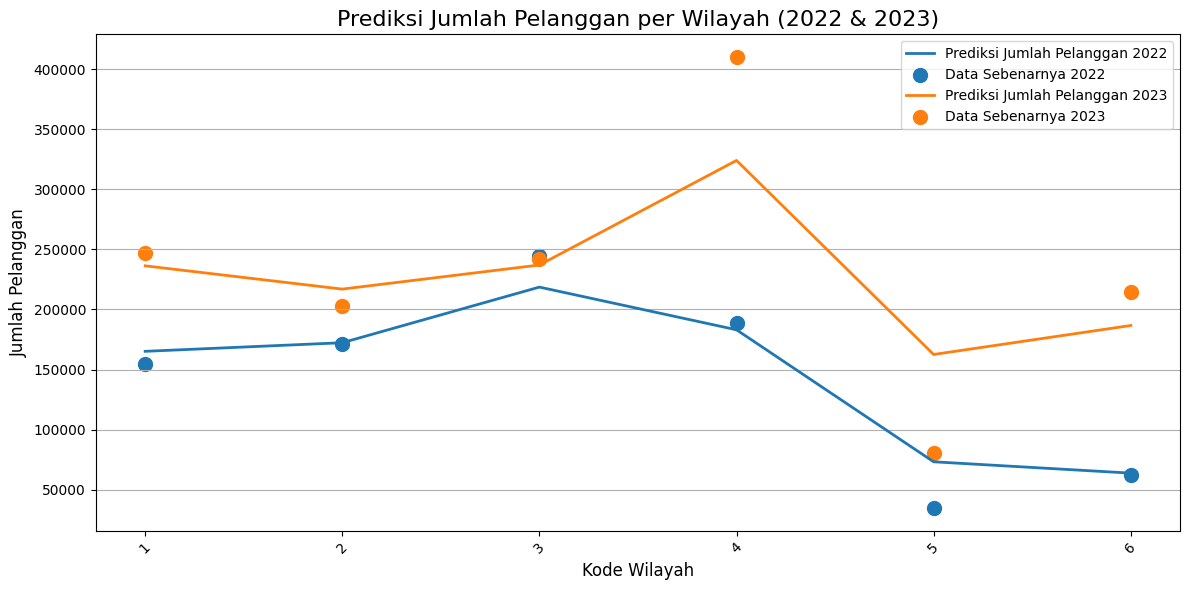

RMSE untuk tahun 2022: 19552.37
MAE untuk tahun 2022: 13739.57
MAPE untuk tahun 2022: 22.16%

RMSE untuk tahun 2023: 50325.84
MAE untuk tahun 2023: 37475.42
MAPE untuk tahun 2023: 24.68%

Metrik Evaluasi Keseluruhan:
RMSE: 38177.12
MAE: 25607.49
MAPE: 23.42%


Tabel Hasil Prediksi:
    YEAR  KODE_WILAYAH  Jumlah Pelanggan  Prediksi Jumlah Pelanggan
0   2022             1            155010                  165192.40
1   2022             2            171280                  172351.20
2   2022             3            244690                  218631.40
3   2022             4            188640                  183115.20
4   2022             5             34840                   73285.20
5   2022             6             62700                   63855.20
6   2023             1            247275                  236327.15
7   2023             2            203285                  216971.55
8   2023             3            241700                  237026.20
9   2023             4            410

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mengubah Kode Wilayah menjadi integer
df['KODE_WILAYAH'] = df['Kode Wilayah'].astype(int)

# Mengelompokkan data berdasarkan Kode Wilayah dan Tahun, menghitung jumlah pelanggan
grouped_data = df.groupby(['KODE_WILAYAH', 'YEAR']).agg({'BW': 'sum'}).reset_index()
grouped_data.rename(columns={'BW': 'Jumlah Pelanggan'}, inplace=True)

# Mengurutkan data berdasarkan tahun
grouped_data.sort_values(by=['YEAR'], inplace=True)

# Menampilkan hasil grouped_data
print(grouped_data)

# Daftar tahun yang unik
unique_years = grouped_data['YEAR'].unique()

# Menyimpan hasil metrik
metrics = {}
results = []

# Inisialisasi variabel untuk menyimpan data prediksi
combined_years_data = []


# Membuat plot dan prediksi untuk setiap tahun secara terpisah
for year in unique_years:
    plt.figure(figsize=(12, 6))

    # Mengambil data untuk tahun tertentu
    df_year = grouped_data[grouped_data['YEAR'] == year]

    # Menyiapkan fitur dan target untuk tahun ini
    X_year = df_year['KODE_WILAYAH'].values.reshape(-1, 1)  # Fitur (kode wilayah)
    y_year = df_year['Jumlah Pelanggan'].values  # Target (jumlah pelanggan)

    # Membuat dan melatih model Random Forest untuk tahun ini
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_year, y_year)

    # Melakukan prediksi untuk tahun ini
    y_pred = model.predict(X_year)

    # Menyimpan hasil prediksi ke dalam DataFrame
    results.append(pd.DataFrame({
        'YEAR': year,
        'KODE_WILAYAH': df_year['KODE_WILAYAH'],
        'Jumlah Pelanggan': df_year['Jumlah Pelanggan'],
        'Prediksi Jumlah Pelanggan': y_pred
    }))

    # Menghitung metrik evaluasi untuk tahun ini
    rmse = np.sqrt(mean_squared_error(y_year, y_pred))
    mae = mean_absolute_error(y_year, y_pred)
    mape = np.mean(np.abs((y_year - y_pred) / y_year)) * 100

    # Menyimpan metrik dalam dictionary
    metrics[year] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

    # Menyimpan data untuk gabungan grafik
    combined_years_data.append({
        'YEAR': year,
        'KODE_WILAYAH': df_year['KODE_WILAYAH'],
        'Jumlah Pelanggan': df_year['Jumlah Pelanggan'],
        'Prediksi Jumlah Pelanggan': y_pred
    })


    # # Menambahkan garis regresi ke grafik
    # plt.plot(df_year['KODE_WILAYAH'].astype(str), y_pred, color='red', linewidth=2, label='Prediksi Jumlah Pelanggan')
    # plt.scatter(df_year['KODE_WILAYAH'].astype(str), df_year['Jumlah Pelanggan'], color='blue', label='Data Sebenarnya', s=100)

    # # Menambahkan judul dan label
    # plt.title(f'Jumlah Pelanggan per Wilayah pada Tahun {year}', fontsize=16)
    # plt.xlabel('Kode Wilayah', fontsize=12)
    # plt.ylabel('Jumlah Pelanggan', fontsize=12)

    # plt.xticks(rotation=45)
    # plt.grid(axis='y')
    # plt.legend()

    # # Menampilkan grafik
    # plt.tight_layout()
    # plt.show()

# Membuat plot gabungan untuk tahun 2022 dan 2023
plt.figure(figsize=(12, 6))

# Menggambar prediksi dan data sebenarnya untuk setiap tahun
for data in combined_years_data:
    year = data['YEAR']
    plt.plot(data['KODE_WILAYAH'], data['Prediksi Jumlah Pelanggan'], label=f'Prediksi Jumlah Pelanggan {year}', linewidth=2)
    plt.scatter(data['KODE_WILAYAH'], data['Jumlah Pelanggan'], label=f'Data Sebenarnya {year}', s=100)

# Menambahkan judul dan label
plt.title('Prediksi Jumlah Pelanggan per Wilayah (2022 & 2023)', fontsize=16)
plt.xlabel('Kode Wilayah', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menambahkan grid dan legenda
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menggabungkan semua hasil prediksi ke dalam satu DataFrame
results_df = pd.concat(results, ignore_index=True)

# Menampilkan hasil metrik evaluasi untuk setiap tahun
for year, metric in metrics.items():
    print(f"RMSE untuk tahun {year}: {metric['RMSE']:.2f}")
    print(f"MAE untuk tahun {year}: {metric['MAE']:.2f}")
    print(f"MAPE untuk tahun {year}: {metric['MAPE']:.2f}%\n")

# Menghitung metrik evaluasi keseluruhan
X_all = results_df['KODE_WILAYAH'].values.reshape(-1, 1)
y_all = results_df['Jumlah Pelanggan'].values
y_pred_all = results_df['Prediksi Jumlah Pelanggan'].values

overall_rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))
overall_mae = mean_absolute_error(y_all, y_pred_all)
overall_mape = np.mean(np.abs((y_all - y_pred_all) / y_all)) * 100

# Menampilkan metrik evaluasi keseluruhan
print("Metrik Evaluasi Keseluruhan:")
print(f"RMSE: {overall_rmse:.2f}")
print(f"MAE: {overall_mae:.2f}")
print(f"MAPE: {overall_mape:.2f}%\n")

# Menampilkan tabel hasil prediksi
print("\nTabel Hasil Prediksi:")
print(results_df)

# Kesimpulan

# Analisis Prediksi Jumlah Pelanggan, Bandwidth, dan Wilayah

Dalam analisis ini, kami mengevaluasi dua model regresi, yaitu **Linear Regression** dan **Random Forest**, untuk memprediksi tiga variabel: jumlah pelanggan, bandwidth, dan wilayah berdasarkan jumlah pelanggan. Hasil dari model-model ini dianalisis berdasarkan metrik evaluasi seperti RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error).

## Tabel Perbandingan Hasil Prediksi

| Model               | Kategori                           | RMSE        | MAE        | MAPE      |
|---------------------|------------------------------------|-------------|------------|-----------|
| **Linear Regression** | Prediksi Jumlah Pelanggan         | 388.89      | 369.85     | 8.80%     |
|                     | Prediksi Bandwidth                 | 4884.21     | 3906.78    | 51.63%    |
|                     | Prediksi Wilayah                   | 78211.56    | 56829.52   | 47.70%    |
| **Random Forest**   | Prediksi Jumlah Pelanggan         | 794.26      | 679.37     | 16.95%    |
|                     | Prediksi Bandwidth                 | 860.20      | 733.80     | 26.61%    |
|                     | Prediksi Wilayah                   | 38177.12    | 25607.49   | 23.42%    |

## Kesimpulan Hasil

1. **Prediksi Jumlah Pelanggan**:
   - **Linear Regression** memiliki performa yang baik dengan RMSE (388.89), MAE (369.85), dan MAPE (8.80%).
   - **Random Forest** menunjukkan hasil yang sedikit lebih buruk dengan RMSE (794.26), MAE (679.37), dan MAPE (16.95%).
   - **Kesimpulan**: Linear Regression lebih baik dalam memprediksi jumlah pelanggan.

2. **Prediksi Bandwidth**:
   - **Linear Regression** menunjukkan akurasi rendah dengan RMSE (4884.21), MAE (3906.78), dan MAPE (51.63%).
   - **Random Forest** menunjukkan performa jauh lebih baik dengan RMSE (860.20), MAE (733.80), dan MAPE (26.61%).
   - **Kesimpulan**: Random Forest lebih efektif dalam memprediksi bandwidth.

3. **Prediksi Wilayah**:
   - **Linear Regression** tidak mampu memprediksi wilayah dengan baik, RMSE (78211.56), MAE (56829.52), dan MAPE (47.70%).
   - **Random Forest** jauh lebih unggul dengan RMSE (38177.12), MAE (25607.49), dan MAPE (23.42%).
   - **Kesimpulan**: Random Forest jauh lebih baik dalam memprediksi wilayah.

## Analisis Umum
- **Model Performance**: Linear Regression lebih baik untuk jumlah pelanggan, sementara Random Forest menunjukkan kinerja yang lebih baik dalam memprediksi bandwidth dan wilayah.
- **Pentingnya Model**: Pemilihan model harus disesuaikan dengan jenis data dan kompleksitas hubungan antar variabel.
- **Akurasi dan Kesalahan**: Metrik seperti RMSE, MAE, dan MAPE memberikan wawasan penting tentang kinerja model.

Dengan informasi ini, Anda dapat lebih memahami kinerja masing-masing model dan memilih model yang paling sesuai untuk aplikasi di masa depan.
